In [4]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# sample_rate, data = wavfile.read("AAA.wav")
sample_rate, data = wavfile.read("original.wav")
if data.ndim == 2:
    data = data[:, 0]

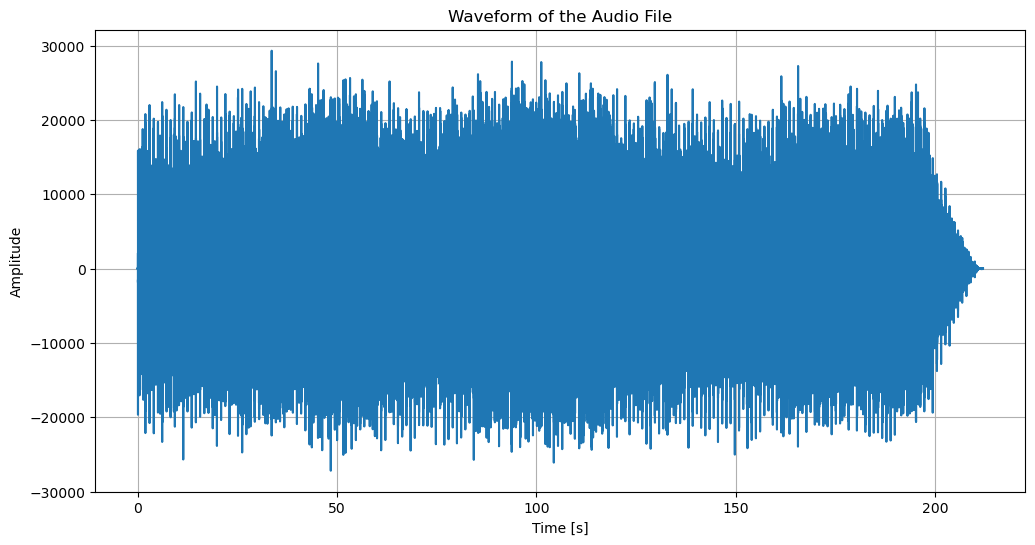

In [6]:
duration = len(data) / sample_rate
time = np.linspace(0.0, duration, len(data))

plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform of the Audio File")
plt.grid()
plt.show()

5089071 10178143 5089071


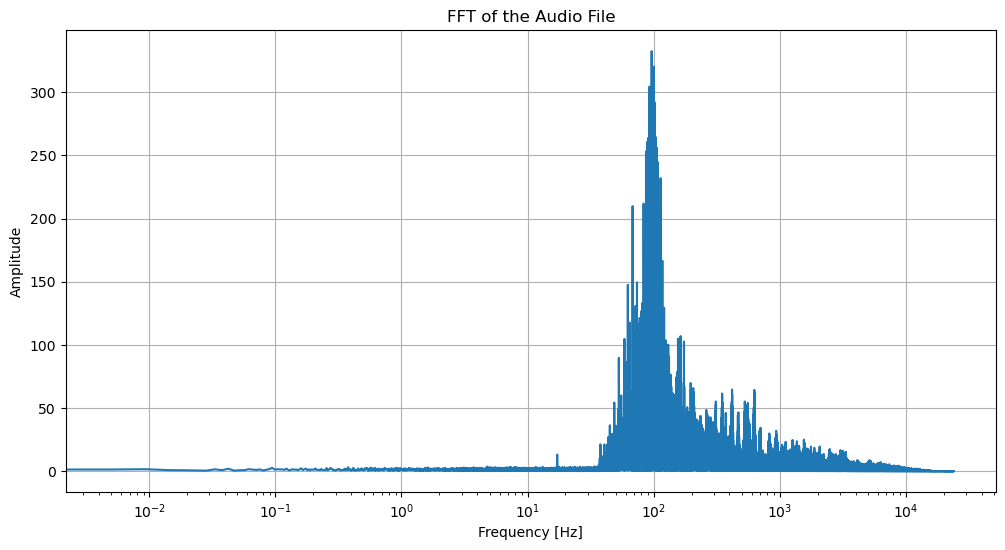

In [7]:
N = len(data)
T = 1.0 / sample_rate

yf = fft(data)
yf_half = 2.0 / N * np.abs(yf[0 : N // 2])
xf = fftfreq(N, T)[: N // 2]

print(len(xf), len(yf), len(yf_half))

plt.figure(figsize=(12, 6))
plt.plot(xf, yf_half)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("FFT of the Audio File")
plt.grid()
plt.xscale("log")
plt.show()


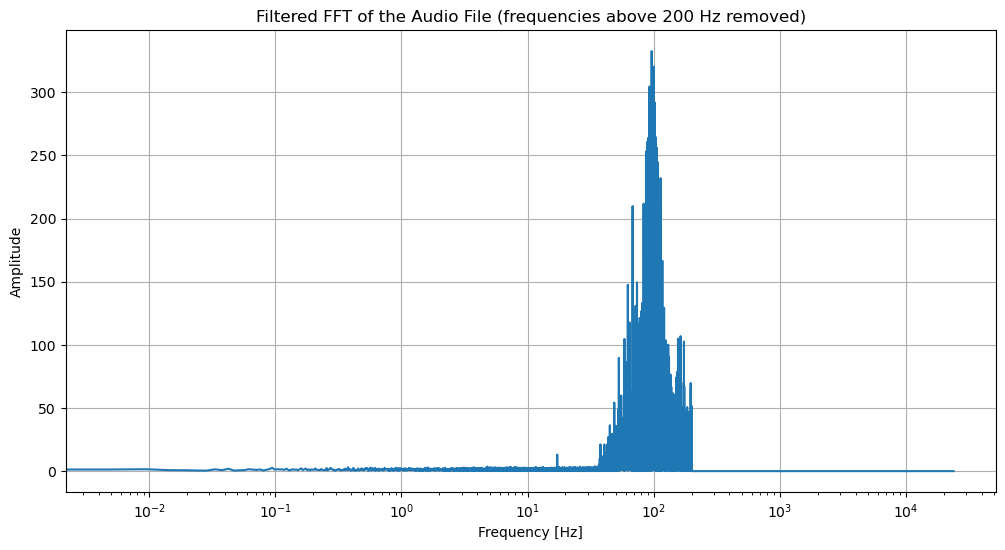

In [8]:
# Define the cutoff frequency
N_cutoff = 200 # Replace with your desired cutoff frequency in Hz

# Compute the full frequency array
xf = fftfreq(N, T)  # Do not slice here

# Apply the filter to zero out components above N_cutoff
yf_filtered = yf.copy()  # Make a copy to avoid changing the original FFT
yf_filtered[np.abs(xf) > N_cutoff] = 0  # Apply the mask to the full array

# Compute the inverse FFT to visualize the filtered signal in the time domain (optional)
filtered_signal = ifft(yf_filtered)

# Plot the filtered frequency spectrum (positive half)
yf_half_filtered = 2.0 / N * np.abs(yf_filtered[0:N // 2])

plt.figure(figsize=(12, 6))
plt.plot(xf[:N // 2], yf_half_filtered)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title(f"Filtered FFT of the Audio File (frequencies above {N_cutoff} Hz removed)")
plt.grid()
plt.xscale("log")
plt.show()


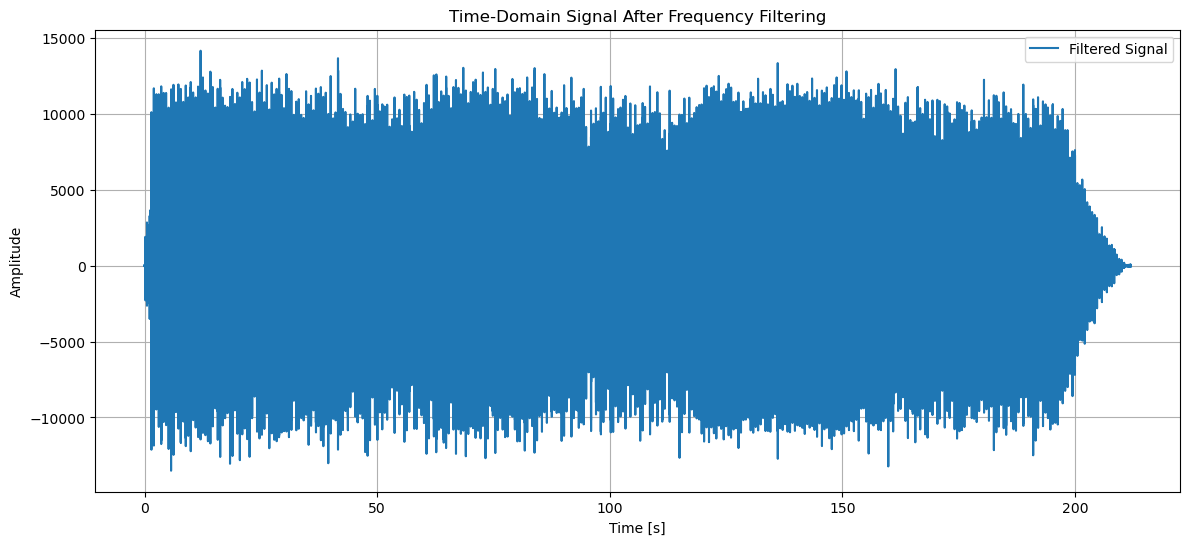

In [10]:
# Ensure the filtered signal is real (ignore any tiny imaginary parts due to numerical computation)
filtered_signal_real = np.real(filtered_signal)

# Create a time axis for the original and filtered signals
time = np.linspace(0, N * T, N, endpoint=False)  # Time axis

# Plot the original and filtered time-domain signals
plt.figure(figsize=(14, 6))
plt.plot(time, filtered_signal_real, label="Filtered Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Time-Domain Signal After Frequency Filtering")
plt.grid()
plt.legend()
plt.show()


In [11]:
from scipy.io.wavfile import write

# Ensure the filtered signal is in the correct format (e.g., int16)
# Normalize and convert if necessary
filtered_signal_real = np.real(filtered_signal)

# Normalize the signal to the range of int16 if the original file was in int16 format
filtered_signal_real = np.int16(filtered_signal_real / np.max(np.abs(filtered_signal_real)) * 32767)

# Save the filtered signal to a new WAV file
write('filtered_audio.wav', sample_rate, filtered_signal_real)

print("Filtered audio saved to 'filtered_audio.wav'")


Filtered audio saved to 'filtered_audio.wav'
